In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

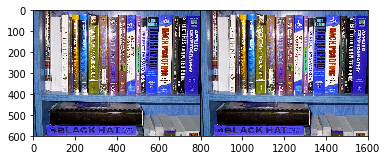

In [13]:
image = cv2.imread("pic.jpg")
image_out = np.zeros(image.shape, dtype=np.uint8)
plt.imshow(image)

In [14]:
image.shape

(600, 1600, 3)

In [15]:
image_orig = cv2.imread('pic.jpg')
cv2.imwrite('temp.jpg', image_orig, [cv2.IMWRITE_JPEG_QUALITY, 90])
image_re = cv2.imread("temp.jpg")


In [16]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [17]:
%%cython -a

def ela_slow(image, image_re, image_out):
    h = image.shape[0]
    w = image.shape[1]
    
    for y in range(0, h):
        for x in range(0, w):
        
            image_out[y, x, 0] = abs(image[y, x, 0] - image_re[y, x, 0])*10
            image_out[y, x, 1] = abs(image[y, x, 1] - image_re[y, x, 1])*10
            image_out[y, x, 2] = abs(image[y, x, 2] - image_re[y, x, 2])*10

    return image_out

In [18]:
%%cython -a
import cython

@cython.boundscheck(False)
cpdef unsigned char[:, :, :] ela_fast(unsigned char [:, :, :] image, unsigned char [:, :, :] image_re, unsigned char [:, :, :] image_out):
    
    cdef int x, y, w, h
    
    h = image.shape[0]
    w = image.shape[1]
    
    
    for y in range(0, h):
        for x in range(0, w):
            
            image_out[y, x, 0] = abs(image[y, x, 0] - image_re[y, x, 0])*10
            image_out[y, x, 1] = abs(image[y, x, 1] - image_re[y, x, 1])*10
            image_out[y, x, 2] = abs(image[y, x, 2] - image_re[y, x, 2])*10

    
    
    return image_out

In [ ]:
%timeit ela_slow(image, image_re, image_out)


In [19]:
%timeit ela_fast(image, image_re, image_out)

23.1 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


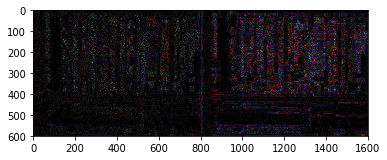

In [20]:
plt.imshow(image_out)


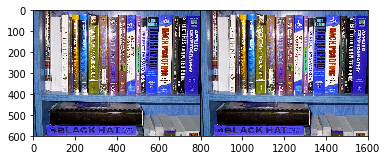

In [21]:
plt.imshow(image_orig)

In [22]:
cv2.imwrite('ela.jpg', image_out,)

True